# Build Machine Learning Model
## Objective
### The project aim is to determine the culverts that need maintenance(due to change in precipitation) based on the culvert rating and this is achieved by building a machine learning model to predict culvert rating 

### import required packages

In [26]:
# for excel loading the datasets
import pandas as pd

# Visualize missing values
import missingno as msno  

# import RandomForestRegressor class from scikitlearn to create random forest model
from sklearn.ensemble import RandomForestRegressor

# import train_test_split function from scikitlearn for dataset splitting
from sklearn.model_selection import train_test_split

# import mean_squared_error function from scikitlearn for model evaluation
from sklearn.metrics import mean_squared_error,  accuracy_score

from sklearn.ensemble import RandomForestClassifier

# for performing a grid search over specified parameter values for a given estimator
from sklearn.model_selection import GridSearchCV   

# for implementing the logistic regression model
from sklearn.linear_model import LogisticRegression




In [2]:
from google.colab import files
uploaded = files.upload()

Saving CDOT_Culvert data.xlsx to CDOT_Culvert data.xlsx


### Loading Required datasets

In [3]:
# load the datasets one by one
# CDOT_Culvert_data
CDOT_Culvert_data = pd.read_excel("CDOT_Culvert data.xlsx")
CDOT_Culvert_data.head()

BRKEY                   FEATINT  FHWA_REGN  DISTRICT  COUNTY  \
0  050B331430BR          UNNAMED DRAINAGE          8        24     101   
1  040A196350BL          UNNAMED DRAINAGE          8        36      49   
2  085G000060BL          UNNAMED DRAINAGE          8        41     123   
3  159A032090BR  SANGRE DE CRISTO DITCH#3          8        57      23   
4  007D068280BR             STANLEY DITCH          8        15      14   

        FACILITY                   LOCATION  CUSTODIAN  OWNER  BB_PCT  ...  \
0        US50 ML     4.3 MI W OF JCT SH 209          1      1      -1  ...   
1        US40 ML  5.1 MI W OF HOT SULFUR SP          1      1      -1  ...   
2  US 85 BUSS RT   0.4 MI S OF JCT US 34 ML          1      1      -1  ...   
3       SH159 ML     1.57 MI S OF JCT US160          1      1       0  ...   
4        SH 7 ML       0.1 MI W OF JCT I-25          1      1      -1  ...   

   structtype  asphaltthi   INSPDATE  SCOURCRIT  DKRATING  SUPRATING  \
0         CBC          72 2019-05-03          5         N          N   
1         CMP          48 2020-07-07          8         N          N   
2         CBC          60 2017-12-08          8         N          N   
3         CMP          36 2021-12-16          8         N          N   
4         CBC         120 2018-01-02          8         N          N   

   SUBRATING  CHANRATING  CULVRATING  MERRA_ID  
0          N           6           7    141818  
1          N           7           7    144119  
2          N           7           6    144697  
3          N           4           6    141240  
4          N           7           6    144121  

[5 rows x 45 columns]

In [4]:
from google.colab import files
uploaded = files.upload()

Saving MerraClimate_Dat_Subset.xlsx to MerraClimate_Dat_Subset.xlsx


In [5]:
# MerraClimate_Dat_Subset
MerraClimate_Dat_Subset = pd.read_excel("MerraClimate_Dat_Subset.xlsx")


# select  2020 data
MerraClimate_Dat_Subset_2020 = MerraClimate_Dat_Subset.loc[MerraClimate_Dat_Subset['YEAR'] == 2020]

MerraClimate_Dat_Subset_2020

MERRA_ID  ELEVATION  YEAR  MONTH  TEMP_AVG  PRECIPITATION  \
153      140659       1561  2020      3       6.4         29.767   
154      140659       1561  2020      2       1.2          9.042   
164      140659       1561  2020      4      11.1          5.846   
169      140659       1561  2020      1      -0.6         17.144   
172      140659       1561  2020      9      19.4          9.951   
...         ...        ...   ...    ...       ...            ...   
18715    145277       1143  2020      8      26.1          7.583   
18716    145277       1143  2020      7      26.0         42.244   
18717    145277       1143  2020     12       0.6         22.438   
18718    145277       1143  2020     11       6.2          2.535   
18719    145277       1143  2020     10       9.0         13.877   

       REL_HUM_AVG_AVG  WIND_VELOCITY_AVG  PERCENT_SUNSHINE_AVG  
153                 55                  2                  49.6  
154                 52                  3                  63.4  
164                 40                  3                  71.3  
169                 62                  2                  58.1  
172                 30                  2                  88.3  
...                ...                ...                   ...  
18715               42                  3                  73.7  
18716               51                  3                  64.3  
18717               54                  3                  54.9  
18718               46                  3                  73.8  
18719               48                  3                  61.2  

[1248 rows x 9 columns]

### Datasets Merging

In [6]:
#  merge MerraClimate_Dat_Subset_2020 to CDOT_Culvert_data

# Let's merge MerraClimate_Dat_Subset_2020 to CDOT_Culvert_data on MERRA_ID
merged_data = pd.merge(MerraClimate_Dat_Subset_2020, CDOT_Culvert_data, on='MERRA_ID')

merged_data.head()

MERRA_ID  ELEVATION  YEAR  MONTH  TEMP_AVG  PRECIPITATION  REL_HUM_AVG_AVG  \
0    140659       1561  2020      3       6.4         29.767               55   
1    140659       1561  2020      3       6.4         29.767               55   
2    140659       1561  2020      3       6.4         29.767               55   
3    140659       1561  2020      3       6.4         29.767               55   
4    140659       1561  2020      3       6.4         29.767               55   

   WIND_VELOCITY_AVG  PERCENT_SUNSHINE_AVG         BRKEY  ... ADTYEAR  \
0                  2                  49.6  160A026270BR  ...    2007   
1                  2                  49.6  160A011010BR  ...    2007   
2                  2                  49.6  160A023140BR  ...    2007   
3                  2                  49.6  160A025310BR  ...    2007   
4                  2                  49.6  160A030110BR  ...    2007   

   structtype  asphaltthi   INSPDATE SCOURCRIT DKRATING  SUPRATING  SUBRATING  \
0         CMP          48 2021-03-23         5        N          N          N   
1         CMP          48 2021-03-18         5        N          N          N   
2         CMP         120 2021-03-23         4        N          N          N   
3         CMP          30 2021-03-23         8        N          N          N   
4         CMP          36 2021-03-23         8        N          N          N   

   CHANRATING  CULVRATING  
0           6           6  
1           5           7  
2           5           6  
3           6           7  
4           7           7  

[5 rows x 53 columns]

In [7]:
merged_data.shape

(71484, 53)

### Data Preparation

#### To make a machine learning model to predict culvert rating, we first need to prepare the data by selecting the relevant features, handling missing values and encoding categorical variables.

In [21]:

# Select relevant features
features = ['YEARBUILT', 'SERVTYPON', 'SERVTYPUND', 'MAINSPANS', 'APPSPANS', 'MAXSPAN', 'LENGTH','MATERIALMA', 'DESIGNMAIN','ELEVATION', 'TEMP_AVG', 'PRECIPITATION', 'REL_HUM_AVG_AVG', 'WIND_VELOCITY_AVG', 'PERCENT_SUNSHINE_AVG', 'BB_PCT','INSPDATE', 'SCOURCRIT', 'DKRATING', 'SUPRATING', 'SUBRATING', 'CHANRATING']

# Drop rows with missing values(Just incase if they are there)
data = merged_data[features + ['CULVRATING']].dropna()

# Data Wrangling
# Check for duplicates
duplicates = merged_data[merged_data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [MERRA_ID, ELEVATION, YEAR, MONTH, TEMP_AVG, PRECIPITATION, REL_HUM_AVG_AVG, WIND_VELOCITY_AVG, PERCENT_SUNSHINE_AVG, BRKEY, FEATINT, FHWA_REGN, DISTRICT, COUNTY, FACILITY, LOCATION, CUSTODIAN, OWNER, BB_PCT, YEARBUILT, HISTSIGN, SERVTYPON, SERVTYPUND, MAINSPANS, APPSPANS, MAXSPAN, LENGTH, MATERIALMA, DESIGNMAIN, PLACECODE, USERKEY1, USERKEY2, USERKEY3, BRIDGE_STA, PRECISE_LA, PRECISE_LO, Lon, ON_UNDER, KIND_HWY, LEVL_SRVC, ROUTENUM, KMPOST, ADTTOTAL, ADTYEAR, structtype, asphaltthi, INSPDATE, SCOURCRIT, DKRATING, SUPRATING, SUBRATING, CHANRATING, CULVRATING]
Index: []

[0 rows x 53 columns]


<Axes: >

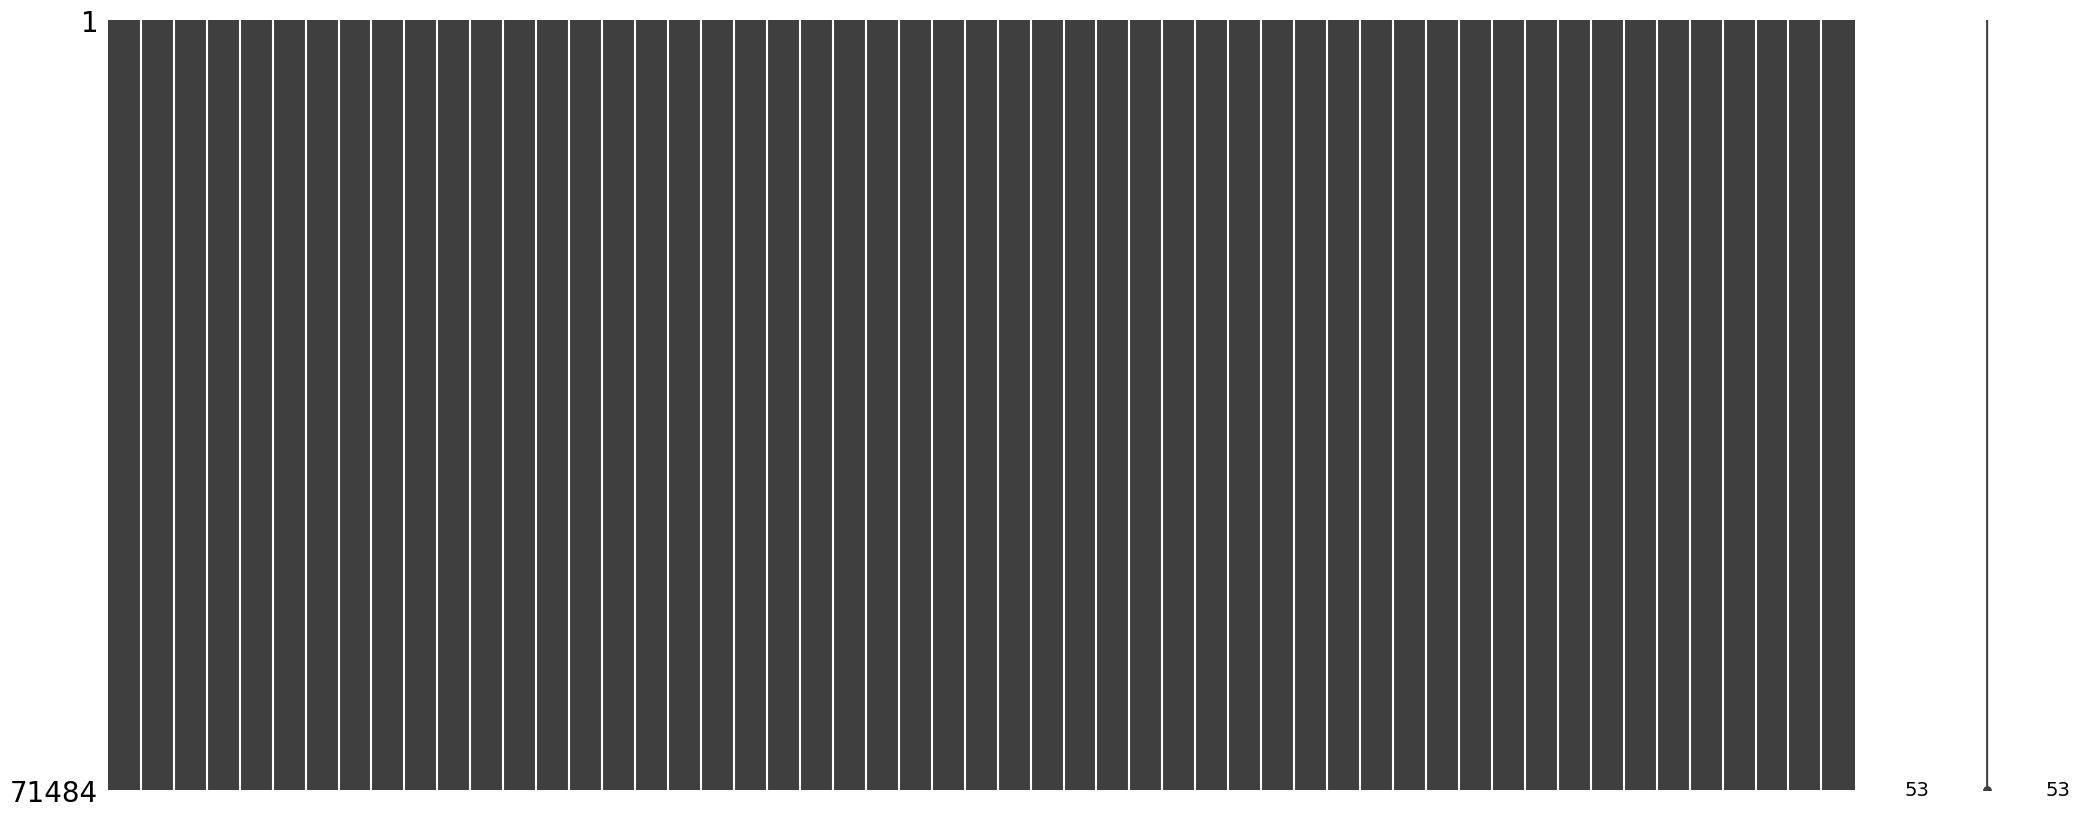

In [22]:

# Plot a graph of the missing values
msno.matrix(merged_data)

In [23]:
# One Hot Encoding
# Encode categorical variables
categorical_features = ['INSPDATE', 'SCOURCRIT','DKRATING', 'SUPRATING', 'SUBRATING']
# 'DKRATING', 'SUPRATING', 'SUBRATING',
for feature in categorical_features:
    data[feature] = pd.factorize(data[feature])[0]


### Data Partitioning

In [24]:

# Split data into features and target
X = data[features]
y = data['CULVRATING']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building, Optimization/Tuning

##### 1. Random Forest

In [30]:

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=10)

# Use GridSearchCV to tune hyperparameters
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", rfc_cv.best_params_)
print("Accuracy Score:", rfc_cv.best_score_)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score: 0.7388390948456419


##### Random Forest Model Evaluation

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.06544899807431714


#### Based on the hyperparameter tuning, the best combination of hyperparameters for the random forest classifier is {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, with an accuracy score of 0.7388. The MSE obtained for the random forest regressor on the test set is 0.06545, which can be interpreted as the average squared difference between the predicted and actual target variable values. A lower value of MSE indicates better performance of the model.

##### 2. Logistic Regression

In [27]:
# Model 2: Implement Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 2. Logistic Regression Model Evaluation

In [28]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression MSE:", mse)


Logistic Regression Accuracy: 0.4107155347275652
Logistic Regression MSE: 1.6702105336783941


#### Logistic Regression emerged with an accuracy score of 0.4107 which is less than that of Random Forest(0.7388). The MSE obtained for the Logistic Regression on the test set is 1.6702 which is higher than that of Random Forest (0.06545), which can be interpreted as the average squared difference between the predicted and actual target variable values. A higher value of MSE indicates poor performance of the model. 

##### The mean squared error (MSE) is a common metric which we used in this project to evaluate the performance of the random forest model created to predict culvert rating. The MSE measures the average squared difference between the predicted and actual culvert ratings, with lower values indicating better performance.

##### For instance, the MSE of  Random Forest (0.06545), indicates that this model has a relatively low error rate in predicting culvert ratings. Besides, the MSE of Logistic Regression (1.6702) , indicates that this model has a relatively high error rate in predicting culvert ratings. 

##### Thus, based on the given results, the Random Forest model appears to be reasonably accurate in predicting culvert rating and could be useful in identifying culverts in need of maintenance due to changes in precipitation when compared with Logistic Regression.

##### We conclude that, Random Forest model is the best model for the culvet dataset in making predictions.